<a href="https://colab.research.google.com/github/aryan1209/TEAM-COMPUTEKIT--QCG/blob/main/Pronounciation_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pronounciation Game**

This game is used to help kids to remember how a particular english alphabet is spelled. The audio files will help them easily get the correct pronounciation of that alphabet.Also, it includes an assignment where the total score will be generated for the same.

In [2]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing QuantumRegister, QuantumCircuit, CassicalRegister & execute**

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
import numpy as np
cir=QuantumCircuit()

Since we are storing 26 items in our numpy array, we will be taking 5 qubits in our quantum circuit

--> 2^4 + 2^3 + 2^2 + 2^1 + 2^0 = 31

We will then be appying hadamard gates to these qubits using qr and finally for each qubit measure it using classical register. 

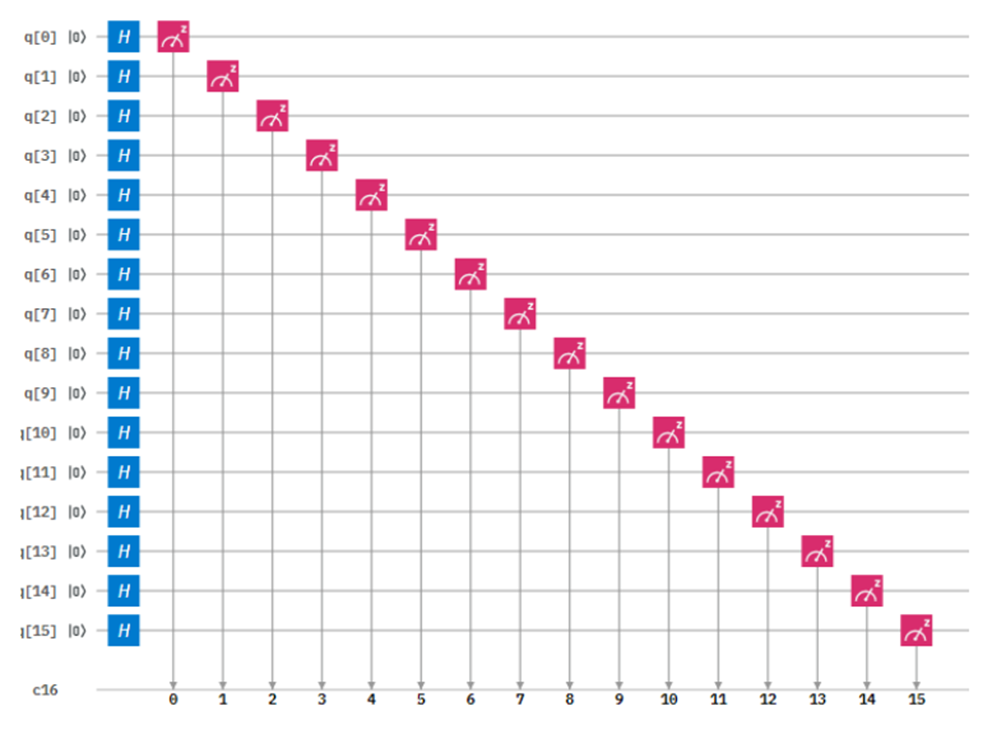

# **Explaining using the quantum circuit:**

In [4]:
qr = QuantumRegister(5,'qr')
cir.add_register(qr)
cr = ClassicalRegister(5,'cr')
cir.add_register(cr)
cir.h(qr)
cir.measure(qr,cr)
cir.draw()

┌───┐┌─┐            
qr_0: ┤ H ├┤M├────────────
      ├───┤└╥┘┌─┐         
qr_1: ┤ H ├─╫─┤M├─────────
      ├───┤ ║ └╥┘┌─┐      
qr_2: ┤ H ├─╫──╫─┤M├──────
      ├───┤ ║  ║ └╥┘┌─┐   
qr_3: ┤ H ├─╫──╫──╫─┤M├───
      ├───┤ ║  ║  ║ └╥┘┌─┐
qr_4: ┤ H ├─╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║ └╥┘
cr_0: ══════╩══╬══╬══╬══╬═
               ║  ║  ║  ║ 
cr_1: ═════════╩══╬══╬══╬═
                  ║  ║  ║ 
cr_2: ════════════╩══╬══╬═
                     ║  ║ 
cr_3: ═══════════════╩══╬═
                        ║ 
cr_4: ══════════════════╩═

# **Defining function for random number generator:**

In [5]:
from qiskit import Aer
def num_generator():
 def random_n():
  backend=Aer.get_backend('statevector_simulator')
  job = execute(cir, backend, shots=1)
  counts = job.result().get_counts(cir)
  return int(list(counts.keys())[0],2)
 num=random_n()
 while num==0 or num>=27 :
  num=random_n()
 return num 
 

User input for total number of alphabets he/she wants to hear and guess them.

In [6]:
print('input no. of alphabets')
n=int(input())
random_array=[0]*n
for i in range(n):
 random_array[i]=num_generator()

input no. of alphabets
5


Installing gTTs which is helpful in conversion of words to audio files:

In [7]:
!pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Using gtts and Ipython to run all the items in the numpy array in the form of audio files.

By default, all the alphabets will run in order from 1(A) to 26(Z) 

In [9]:
from gtts import gTTS
from IPython.display import Audio
from IPython.display import display
import numpy as np
from numpy import random
import time
import datetime
list1 = np.array(["none","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"])
print("Let's see how each alphabet is pronounced in order")
for voice in list1 :
      if voice=="none":
        continue
      tts = gTTS("{}".format(voice)) 
      tts.save('1.wav')
      sound_file = '1.wav'
      wn = Audio(sound_file, autoplay=True)
      display(wn)
      time.sleep(1)

Let's see how each alphabet is pronounced in order


Now, only the audio files of those alphabets will run corresponding to the random numbers generated.Finally, the total score of the user will be displayed.

In [10]:
count=0
for i in random_array:
      voice=list1[i]
      tts = gTTS("{}".format(voice)) 
      tts.save('1.wav')
      sound_file = '1.wav'
      wn = Audio(sound_file, autoplay=True)
      display(wn)##"""
      print("Guess the alphabet?")
      alpha = input()
      if alpha.upper()==list1[i]:
        print("Good go ahead!!")
        count+=1
      else:
        print("Oops you got it wrong! Try again...")
      time.sleep(2)
print("Your total score: ",count," out of ",n)   


Guess the alphabet?
w
Good go ahead!!


Guess the alphabet?
H
Good go ahead!!


Guess the alphabet?
J
Oops you got it wrong! Try again...


Guess the alphabet?
U
Good go ahead!!


Guess the alphabet?
H
Oops you got it wrong! Try again...
Your total score:  3  out of  5
